In [1]:
import networkx as nx # import the module
import matplotlib.pyplot as plt

Let's make a graph!

In [7]:
G = nx.Graph()  # create an empty graph

Not very exciting so far, we have simply created a good old python **object**, **instantied** from the networkx Graph **class**. (This is object-oriented programming (OOP) lingo, see [week 5's content on classes](https://moodle.bbk.ac.uk/course/view.php?id=40167&section=9) if you want to refresh your memory!

For now, remember you can always type `help(nx)` to get the documentation for networkx, and help(G) to get information on the Graph class:

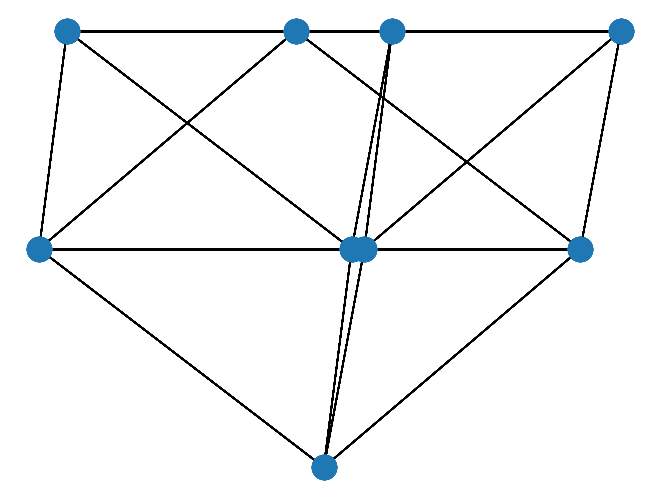

In [33]:
Gx = nx.sudoku_graph(3)
nx.draw(Gx, pos=nx.spectral_layout(Gx))
plt.show()

In [24]:
help(nx.draw)

Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    ax : Matplotlib Axes object, optional
       Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
       See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahedral_gr

First, let's add some nodes to our graph, and then plot it:

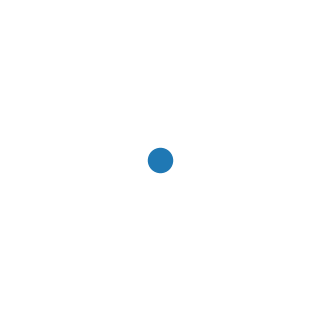

In [34]:
G.add_node("A")
# The default figure size is quite large, so I'm specifying a smaller one using plt.figure
fig = plt.figure(figsize=(3,3))
nx.draw(G)
plt.show()

The dot you should see above represent the node we just created.
We can access the list of nodes with the following code:

In [35]:
G.nodes

NodeView(('A',))

A graph with a single node is not very interesting, let's add another one:

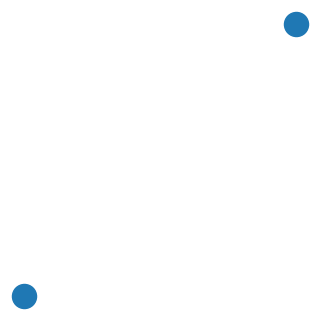

In [36]:
G.add_node("B")
fig = plt.figure(figsize=(3,3))
nx.draw(G)
plt.show()

We now get two dots! They are not connected in any way, since we did not create any edges yet:

In [37]:
G.edges

EdgeView([])

Let's add some edges:

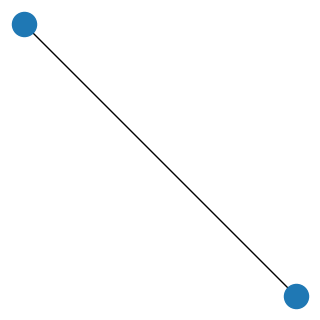

In [39]:
fig = plt.figure(figsize=(3,3))
G.add_edge("A", "B")
nx.draw(G)
plt.show()

We now have an **edge** connecting the two **nodes** in our **graph**. The content of G.edges has been updated to reflect that:

In [40]:
G.edges

EdgeView([('A', 'B')])

You may be wondering which node is A, and which is B.
To see that, we can alter how graphs look!

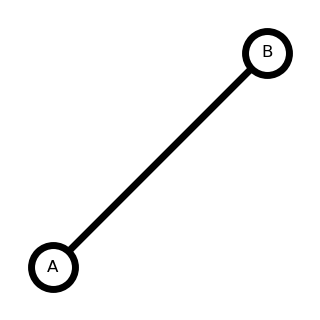

In [46]:
# Try playing with the options here and see how that affects the graph's appearance.
# options = {"font_size": 36,"node_size": 3000,"node_color": "white","edgecolors": "black","linewidths": 5,"width": 5,}
options = {"node_size":1000,"node_color": "white","edgecolors": "black","linewidths": 5,"width": 5,}

fig = plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, **options)
# what does gca do? I will let you figure it out...
plt.gca().margins(0.20)
plt.show()

networkx has some sample graphs that we can load, so that we don't have to spend too much time creating nodes and edges when testing some code.

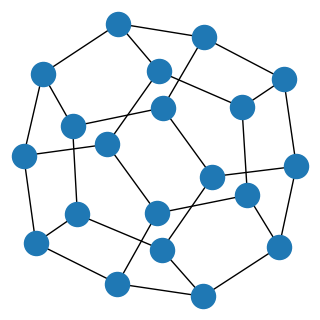

In [50]:
G = nx.dodecahedral_graph()

fig = plt.figure(figsize=(3,3))
nx.draw(G)
plt.show()

If you run this cell a few times, you may notice the plot changes slightly. The nodes and edges do not change, but the way networkx lays it out is stochastic (meaning, somewhat random!)).

Some of the sample graphs are more complicated than others:

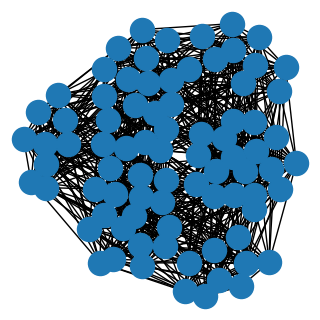

In [51]:
G = nx.sudoku_graph(3)
fig = plt.figure(figsize=(3,3))
nx.draw(G)
plt.show()

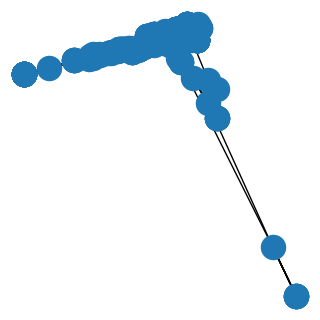

In [53]:
G = nx.internet_as_graphs.random_internet_as_graph(1000)
fig = plt.figure(figsize=(3,3))
nx.draw(G, pos = nx.spectral_layout(G))
plt.show()

We can also change the layout (note, this does not change the graph connectivity! merely the way it is presented)

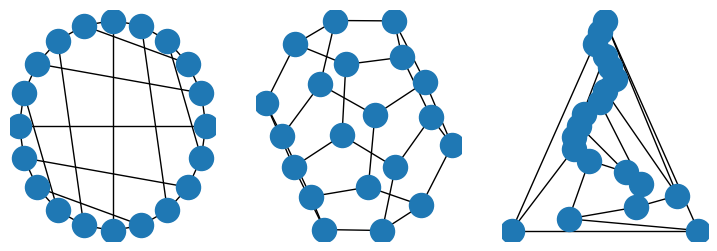

In [55]:
G = nx.dodecahedral_graph()
fig, axes = plt.subplots(1, 3, figsize=(9,3))
for ax, layout_algo in zip(axes, [nx.circular_layout, nx.spring_layout, nx.planar_layout]):
    nx.draw(G, pos=layout_algo(G), ax=ax)
plt.show()

Once again, the graph information **does not change!** Only the way it is visualised.
You can get vastly different impressions for a given graph, based on the way it is laid out.

So care must be taken when interpreting graphs!

You can precisely control the way a graph is displayed, using some more advanced customisation:

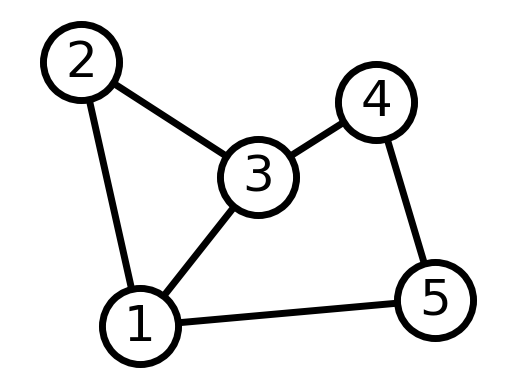

In [81]:
# taken from networkx documentation:
# https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html#sphx-glr-auto-examples-basic-plot-simple-graph-py
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

We can plot various properties, such as the degree of each node (the degree is the number connecting to a given node)

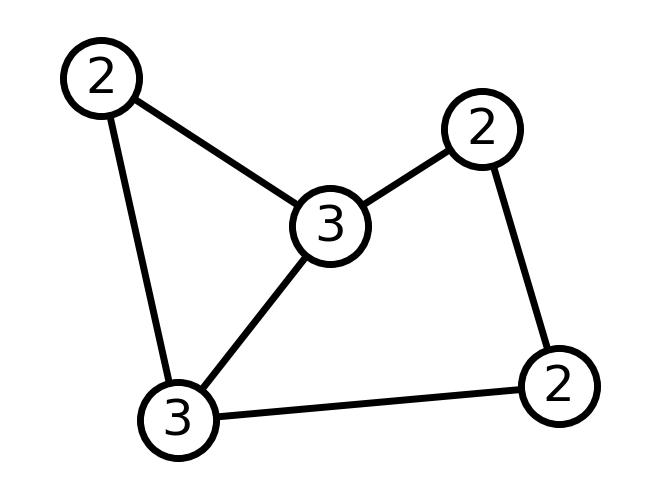

In [58]:
nx.draw(G, pos, labels=dict(G.degree()), **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

Once again, to hopefully convince you: the following two plots show the same graph, the nodes (and consequently the edges) are merely in different places!

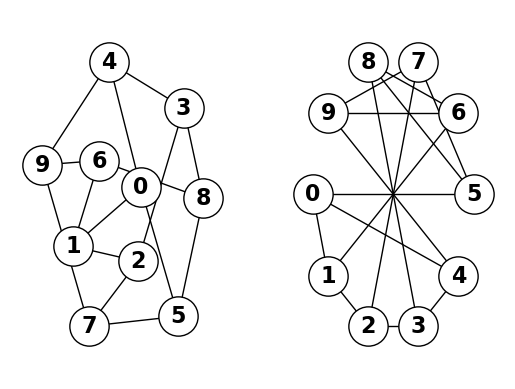

In [62]:
options = {
    "font_size": 16,
    "font_weight": 'bold',
    "node_size": 800,
    "node_color": "white",
    "edgecolors": "black",
}

G = nx.petersen_graph()

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, **options)
subax1.margins(0.20)

subax2 = plt.subplot(122)
nx.draw_shell(G, with_labels=True, **options)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, **options)
subax2.margins(0.20)
plt.show()

# Measures

One of the main ways in which graphs are used, is to better understand the relationship between connected entities.

Questions such as "how important is this specific protein in the human proteome?" or "How many intermediate proteins need to be activated to go from one protein of interest to another?".

To anwer those questions, measures are developed, that aim to capture a specific aspect of the relation between the nodes and edges in a graph, and in turn 

## Distance measure

How far from a specific node are all other nodes in the network?

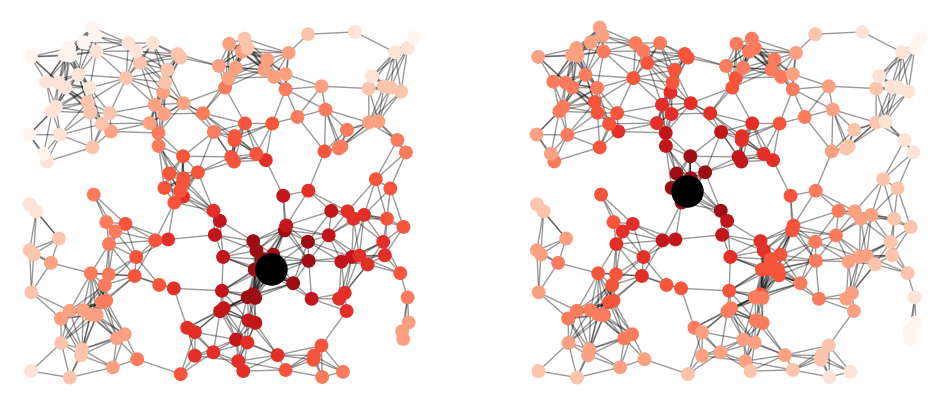

{18: 0, 34: 1, 68: 1, 74: 1, 170: 1, 16: 1, 87: 1, 31: 1, 138: 2, 144: 2, 145: 2, 35: 2, 173: 2, 60: 2, 196: 2, 75: 2, 80: 2, 94: 2, 102: 2, 111: 2, 11: 3, 20: 3, 150: 3, 154: 3, 27: 3, 29: 3, 30: 3, 165: 3, 166: 3, 174: 3, 47: 3, 178: 3, 53: 3, 61: 3, 66: 3, 79: 3, 89: 3, 99: 3, 100: 3, 113: 3, 117: 3, 128: 4, 1: 4, 135: 4, 139: 4, 142: 4, 149: 4, 25: 4, 155: 4, 168: 4, 43: 4, 177: 4, 183: 4, 189: 4, 70: 4, 97: 4, 107: 4, 108: 4, 110: 4, 118: 4, 130: 5, 4: 5, 134: 5, 8: 5, 140: 5, 148: 5, 28: 5, 157: 5, 163: 5, 37: 5, 52: 5, 55: 5, 56: 5, 192: 5, 86: 5, 95: 5, 98: 5, 131: 6, 6: 6, 137: 6, 136: 6, 14: 6, 17: 6, 21: 6, 22: 6, 151: 6, 159: 6, 33: 6, 164: 6, 41: 6, 172: 6, 46: 6, 176: 6, 48: 6, 179: 6, 49: 6, 182: 6, 58: 6, 63: 6, 197: 6, 198: 6, 71: 6, 72: 6, 83: 6, 109: 6, 122: 6, 123: 6, 127: 6, 0: 7, 129: 7, 9: 7, 10: 7, 143: 7, 152: 7, 26: 7, 156: 7, 158: 7, 162: 7, 169: 7, 44: 7, 180: 7, 54: 7, 185: 7, 187: 7, 59: 7, 64: 7, 194: 7, 67: 7, 88: 7, 90: 7, 91: 7, 101: 7, 103: 7, 106: 7,

In [74]:
# adapted from
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html#sphx-glr-auto-examples-drawing-plot-random-geometric-graph-py

G = nx.random_geometric_graph(200, 0.125, seed=896803)

pos = nx.get_node_attributes(G, "pos")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, cnode in zip(axes, (17, 6)):
    p = dict(nx.single_source_shortest_path_length(G, cnode))
    nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)
    ax.axis("off")
    nx.draw_networkx_nodes(G, pos,
                           nodelist=list(p.keys()),
                           node_size=80,
                           node_color=list(p.values()),
                           cmap=plt.cm.Reds_r, ax=ax)
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[cnode,],
                           node_size=500,
                           node_color="black",
                           ax=ax)
    
#fig.tight_layout()
plt.show()
print(nx.single_source_shortest_path_length(G, 18))

In [66]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

Most nodes are quickly accessible from the node on the left, while most are very far from the node on the right.

Using a distance measure, you can quantify this difference.

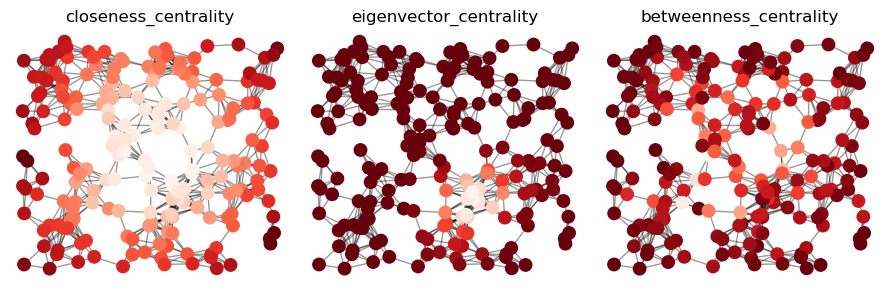

In [75]:
# adapted from
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html#sphx-glr-auto-examples-drawing-plot-random-geometric-graph-py

G = nx.random_geometric_graph(200, 0.125, seed=896803)

pos = nx.get_node_attributes(G, "pos")

# note: this is a list of functions! you can also do this in python
centrality_measures = [nx.centrality.closeness_centrality, nx.centrality.eigenvector_centrality, nx.centrality.betweenness_centrality]

# Number of measures, useful for plotting
Nm = len(centrality_measures)

fig, axes = plt.subplots(1, Nm, figsize=(3*Nm, 3))
for ax, measure in zip(axes, centrality_measures):
    p = dict(measure(G))
    nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)
    ax.axis("off")
    nx.draw_networkx_nodes(G, pos,
                           nodelist=list(p.keys()),
                           node_size=80,
                           node_color=list(p.values()),
                           cmap=plt.cm.Reds_r, ax=ax)
    ax.set_title(measure.__name__)
fig.tight_layout()
plt.show()

We can also plot the degree of each node.
Note the similiarity and differences compared to the centrality measure!

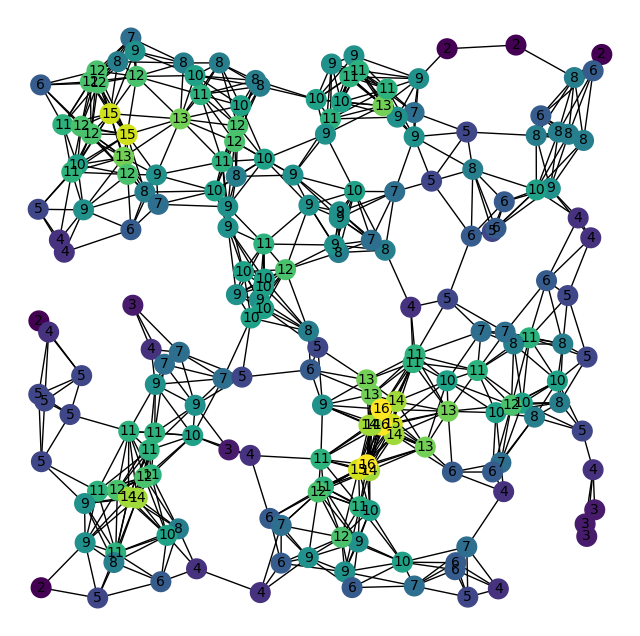

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))
a = nx.draw(G, pos, labels=dict(G.degree()), node_color=[d[1] for d in G.degree()], ax=ax, node_size=200, font_size=10, font_color="black")

plt.show()

And now a real example, gene association network from C. Elegans, see:

https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html#sphx-glr-auto-examples-algorithms-plot-betweenness-centrality-py

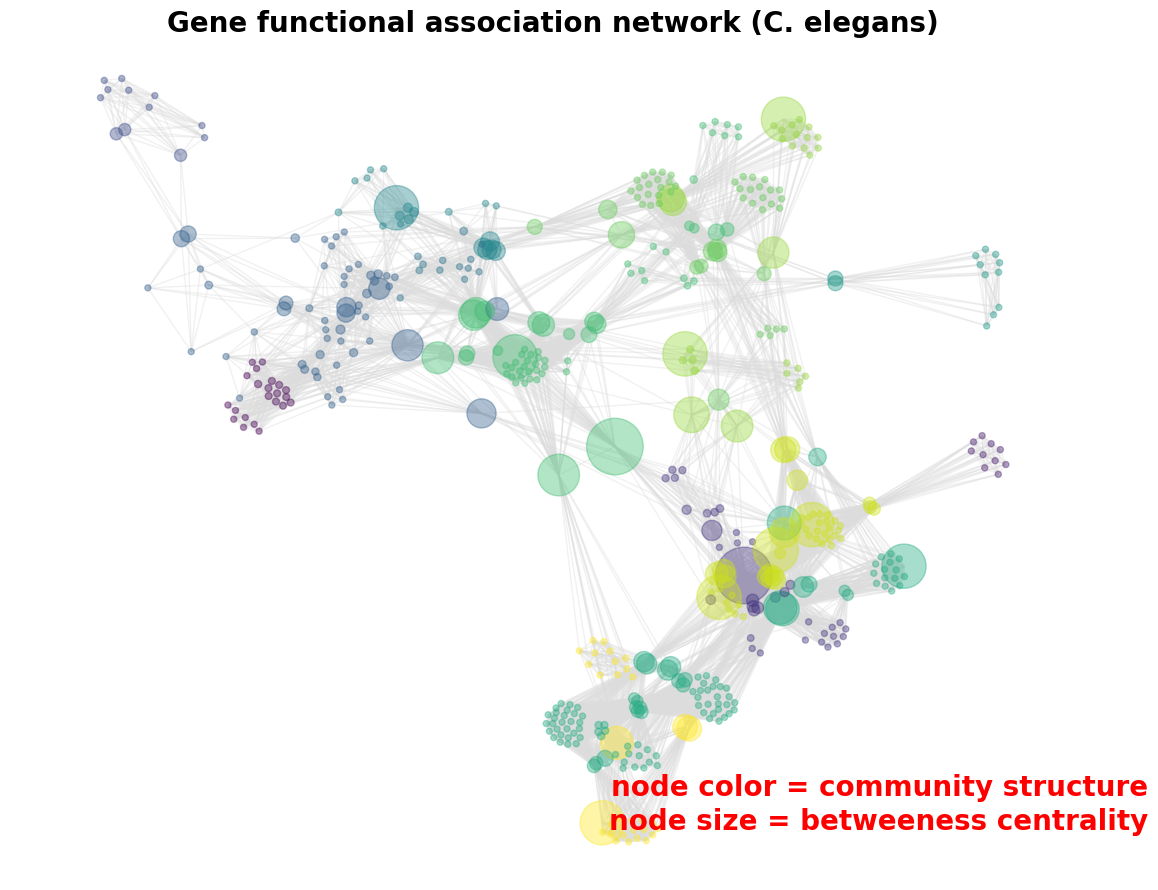

In [78]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
G = nx.read_edgelist("../data/WormNet.v3.benchmark.txt")

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(12, 9))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 10000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [79]:
help(nx.community.label_propagation_communities)

Help on function label_propagation_communities in module networkx.algorithms.community.label_propagation:

label_propagation_communities(G)
    Generates community sets determined by label propagation
    
    Finds communities in `G` using a semi-synchronous label propagation
    method[1]_. This method combines the advantages of both the synchronous
    and asynchronous models. Not implemented for directed graphs.
    
    Parameters
    ----------
    G : graph
        An undirected NetworkX graph.
    
    Yields
    ------
    communities : generator
        Yields sets of the nodes in each community.
    
    Raises
    ------
    NetworkXNotImplemented
       If the graph is directed
    
    References
    ----------
    .. [1] Cordasco, G., & Gargano, L. (2010, December). Community detection
       via semi-synchronous label propagation algorithms. In Business
       Applications of Social Network Analysis (BASNA), 2010 IEEE International
       Workshop on (pp. 1-8). IEEE.

